In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

file_path = r'C:\Users\20224751\Downloads\Book_SN.csv'

df = pd.read_csv(file_path)
print(df.to_string()) 

    time 1  Area 40   time 2  Area 42  time 3  Area 44  time 4  Area 46  Unnamed: 8  Unnamed: 9
0      0.0    0.0000     0.0   0.0000       0   0.0000     0.0   0.0000         NaN         NaN
1      1.0    0.4924     3.0   0.3887       1   0.0000     5.0   0.0000         NaN         NaN
2      2.0    1.3780     5.0   1.8430       3   0.0000    10.0   0.0000         NaN         NaN
3      3.0    2.4260     7.0   2.9250       5   0.4924    15.0   0.6609         NaN         NaN
4      4.0    3.2960    10.0   4.0230       7   0.7988    20.0   1.1240         NaN         NaN
5      5.0    3.9530    15.0   4.9980      10   1.5420    30.0   1.6100         NaN         NaN
6      7.0    4.7070    20.0   5.5760      15   2.7320    40.0   2.2410         NaN         NaN
7     10.0    5.2870    25.0   5.8860      20   3.5900    50.0   3.0170         NaN         NaN
8     15.0    5.7790    30.0   6.1240      25   4.2670    60.0   3.7710         NaN         NaN
9     20.0    6.0900    35.0   6.3380   

In [30]:
df = df.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

In [34]:
df = pd.DataFrame(df)
df.columns = [col.strip() for col in df.columns]
df = df.dropna()
print(df)

    time 1  Area 40  time 2  Area 42  time 3  Area 44  time 4  Area 46
0      0.0   0.0000     0.0   0.0000       0   0.0000     0.0   0.0000
1      1.0   0.4924     3.0   0.3887       1   0.0000     5.0   0.0000
2      2.0   1.3780     5.0   1.8430       3   0.0000    10.0   0.0000
3      3.0   2.4260     7.0   2.9250       5   0.4924    15.0   0.6609
4      4.0   3.2960    10.0   4.0230       7   0.7988    20.0   1.1240
5      5.0   3.9530    15.0   4.9980      10   1.5420    30.0   1.6100
6      7.0   4.7070    20.0   5.5760      15   2.7320    40.0   2.2410
7     10.0   5.2870    25.0   5.8860      20   3.5900    50.0   3.0170
8     15.0   5.7790    30.0   6.1240      25   4.2670    60.0   3.7710
9     20.0   6.0900    35.0   6.3380      30   4.6720    70.0   4.1630
10    25.0   6.3110    45.0   6.3800      40   5.3570    90.0   5.1650


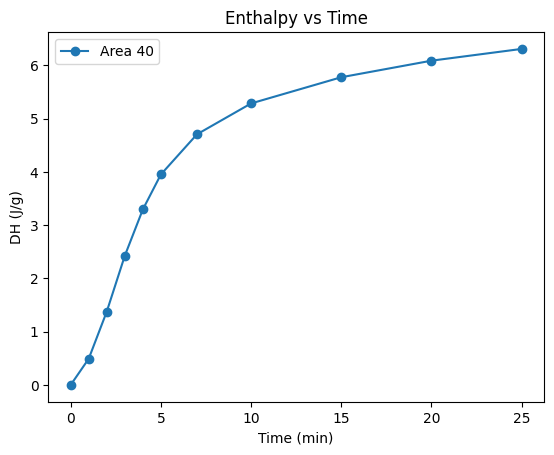

In [35]:
df.plot(x='time 1', y='Area 40', marker='o', linestyle='-')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time')
plt.show()

In [36]:
t_1 = np.array(df['time 1'])
a_1 = np.array(df['Area 40'])
t_2 = np.array(df['time 2'])
a_2 = np.array(df['Area 42'])
t_3 = np.array(df['time 3'])
a_3 = np.array(df['Area 44'])
t_4 = np.array(df['time 4'])
a_4 = np.array(df['Area 46'])

In [48]:
# Define the DH function
def enthalpy(t_data, DHinf, k, tzero, n):
    return DHinf * (1 - np.exp(-k * np.abs(t_data - tzero)**n))
initial_guess1 = (5, 0.05, 0.3, 1)
initial_guess2 = (4, 0.02, 0.2, 1)
initial_guess3 = (3, 0.15, 0.3, 1)
initial_guess4 = (2, 0.3, 0.8, 1)

In [49]:
params1, covariance1 = curve_fit(enthalpy, t_data, a_data, p0=initial_guess1)
params2, covariance2 = curve_fit(enthalpy, t_data, a_data, p0=initial_guess2)
params3, covariance3 = curve_fit(enthalpy, t_data, a_data, p0=initial_guess3)
params4, covariance4 = curve_fit(enthalpy, t_data, a_data, p0=initial_guess4)
# Fitted parameters estraction 
DHinf_1, k_1, tzero_1, n_1 = params1
DHinf_2, k_2, tzero_2, n_2 = params2
DHinf_3, k_3, tzero_3, n_3 = params3
DHinf_4, k_4, tzero_4, n_4 = params4

In [50]:
t_1 = t_1

[6.33668207 0.03746317 3.38329174 1.09533925]
[6.98758453 0.08502253 5.74609059 0.80266097]
[6.98758925 0.08502261 5.74609138 0.80266022]
[6.98758277 0.08502251 5.74609103 0.80266121]


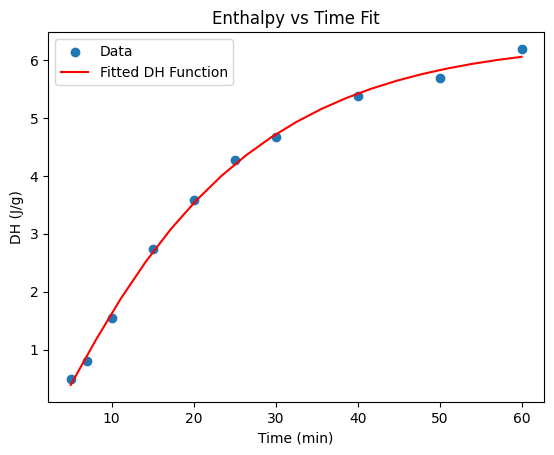

In [47]:
def fitted_enthalpy(t_data):
    return enthalpy(t_data, DHinf_fit, k_fit, tzero_fit, n_fit)

# Plot the original data and the fitted function
plt.scatter(t_data, a_data, label='Data')
t_values = np.linspace(min(t_data), max(t_data), 19)
plt.plot(t_values, fitted_enthalpy(t_values), label='Fitted DH Function', color='red')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time Fit')
plt.legend()
plt.show()

In [12]:
x = np.abs(t_data - tzero_fit)
y = np.log(1 - a_data / DHinf_fit)

print(x)
print(y)

[ 1.61667132  3.61667132  6.61667132 11.61667132 16.61667132 21.61667132
 26.61667132 36.61667132 46.61667132 56.61667132]
[-0.08089145 -0.13474302 -0.27884756 -0.56412092 -0.83596025 -1.1189581
 -1.33671816 -1.88230608 -2.27608014 -3.7795264 ]


LINEAR MODEL

In [14]:
def LogDH(y, k_lin, n_lin):
    return -k_lin * np.abs(x**n_lin)

In [15]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
print(coef)

[-0.06054909  0.15271345]


Text(0.5, 1.0, 'Linear fit')

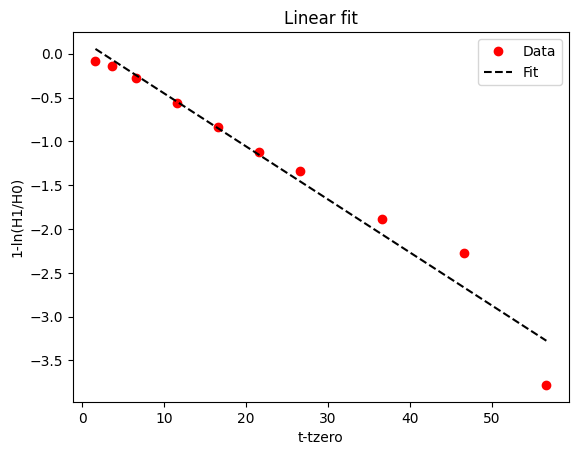

In [16]:
plt.plot(x,y, 'ro', label='Data')
plt.plot(x, poly1d_fn(x), '--k', label='Fit')
plt.legend()
plt.xlabel('t-tzero')
plt.ylabel('1-ln(H1/H0)')
plt.title('Linear fit')